In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
sns.set_theme(style="whitegrid", palette="deep")
weather_data = pd.read_csv("weatherHistory.csv")

columns_to_use = [
    "Temperature (C)",
    "Humidity",
    "Wind Speed (km/h)",
    "Pressure (millibars)"
]

df = weather_data[columns_to_use].copy()
df = df[df["Pressure (millibars)"] > 0].dropna()

df = df.rename(columns={
    "Temperature (C)": "temp_c",
    "Humidity": "humidity",
    "Wind Speed (km/h)": "wind_kmh",
    "Pressure (millibars)": "pressure_mb"
})
df.head(10)

,temp_c,humidity,wind_kmh,pressure_mb
0,9.472222,0.89,14.1197,1015.13
1,9.355556,0.86,14.2646,1015.63
2,9.377778,0.89,3.9284,1015.94
3,8.288889,0.83,14.1036,1016.41
4,8.755556,0.83,11.0446,1016.51
5,9.222222,0.85,13.9587,1016.66
6,7.733333,0.95,12.3648,1016.72
7,8.772222,0.89,14.1519,1016.84
8,10.822222,0.82,11.3183,1017.37
9,13.772222,0.72,12.5258,1017.22


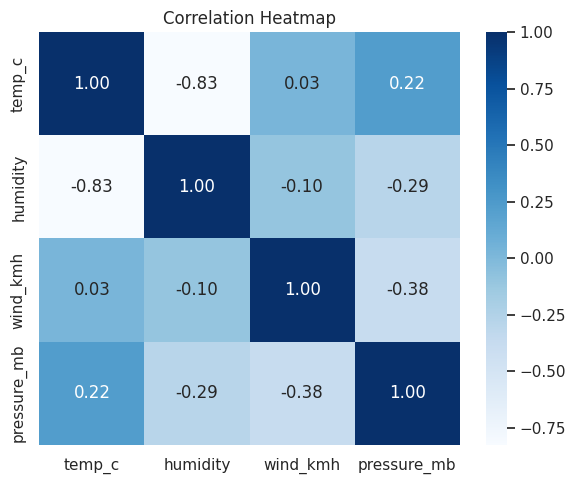

In [56]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

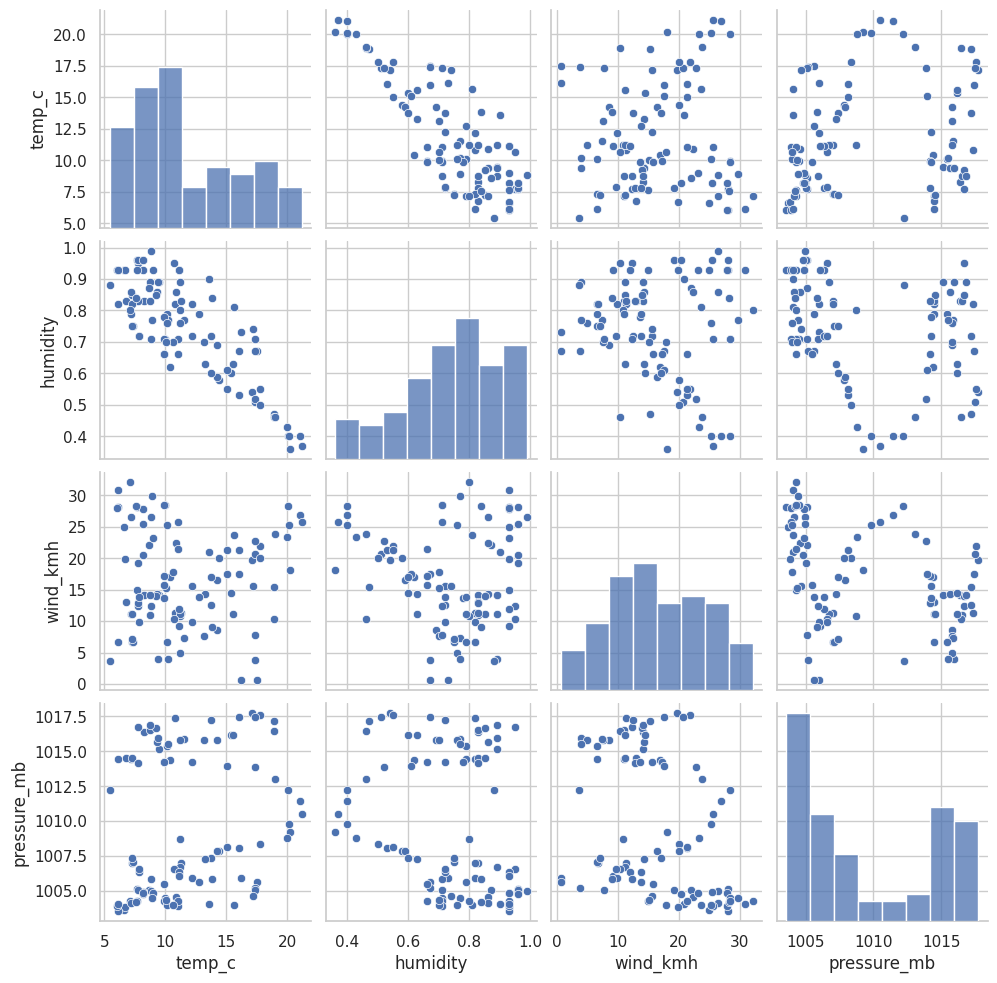

In [57]:
sns.pairplot(df)
plt.show()

In [58]:
X = df[["humidity", "wind_kmh", "pressure_mb"]]
y = df["temp_c"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing  samples: {X_test.shape[0]}\n")

Training samples: 69
Testing  samples: 30



In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [60]:
mae_val = mean_absolute_error(y_test, y_pred)
mse_val = mean_squared_error(y_test, y_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE  : {mae_val:.3f}")
print(f"MSE  : {mse_val:.3f}")
print(f"RMSE : {rmse_val:.3f}")
print(f"R²   : {r2_val:.3f}\n")

Model Performance:
MAE  : 2.125
MSE  : 6.407
RMSE : 2.531
R²   : 0.688



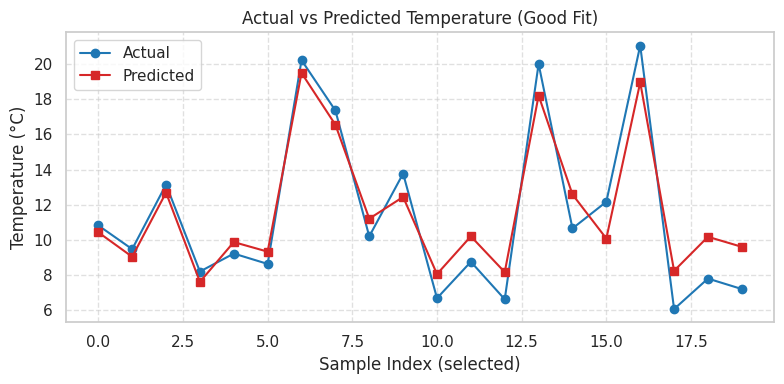

In [61]:
y_true = y_test.values
y_hat = y_pred
errors = np.abs(y_true - y_hat)
best_idx = np.argsort(errors)[:20]
actual_best = y_true[best_idx]
pred_best   = y_hat[best_idx]

plt.figure(figsize=(8, 4))
x_axis = np.arange(len(best_idx))
plt.plot(x_axis, actual_best, marker='o', linestyle='-',
         label="Actual", color='tab:blue')
plt.plot(x_axis, pred_best, marker='s', linestyle='-',
         label="Predicted", color='tab:red')

plt.title("Actual vs Predicted Temperature (Good Fit)")
plt.xlabel("Sample Index (selected)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [62]:
new_condition = pd.DataFrame({
    "humidity": [0.82],
    "wind_kmh": [15.0],
    "pressure_mb": [1018.0]
})

new_temp_prediction = model.predict(new_condition)

print(f"\nPredicted Temperature {new_temp_prediction[0]:.2f} °C")


Predicted Temperature 10.53 °C
